In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [39]:
df=pd.read_csv('Spotify_Youtube.csv')
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [40]:
df.shape

(20718, 28)

In [41]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [42]:
df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [43]:
url_cols = ['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Description']
df.drop(url_cols, axis=1, inplace=True)

In [44]:
df.dropna(inplace=True)

In [45]:
df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [46]:
df["Album_type"].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [47]:
album_type_count=df["Album_type"].value_counts()
album_type_count

album          14148
single          4689
compilation      712
Name: Album_type, dtype: int64

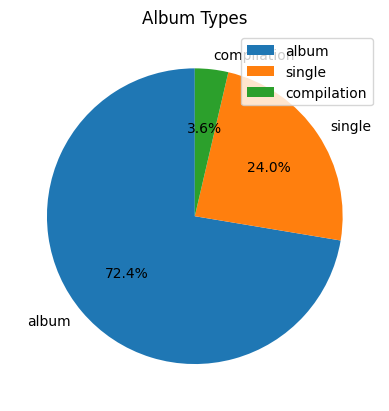

In [48]:
#Create a pie chart
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Album Types')
plt.legend(labels, loc='best')

plt.show()

In [54]:
# Group the songs by artist and views - youtube, stream - spotify
artist_grouped = df.groupby('Artist')[['Views', 'Stream']].sum()

# Sort the artists by the sum of views and streams in descending order
artist_sorted = artist_grouped.sort_values(['Views', 'Stream'], ascending=False)

# Get the top 10 artists with the most number of views on YouTube and streams on Spotify
top_10 = artist_sorted.head(10)

top_10

,Views,Stream
Artist,,
Ed Sheeran,1.546021e+10,1.439488e+10
CoComelon,1.460167e+10,3.690822e+08
Katy Perry,1.312063e+10,6.607329e+09
Charlie Puth,1.216759e+10,7.041187e+09
Luis Fonsi,1.162811e+10,5.054326e+09
Justin Bieber,1.099106e+10,1.209777e+10
Daddy Yankee,1.087193e+10,5.135462e+09
Bruno Mars,1.024092e+10,1.089786e+10
Macklemore & Ryan Lewis,1.012206e+10,3.982978e+09


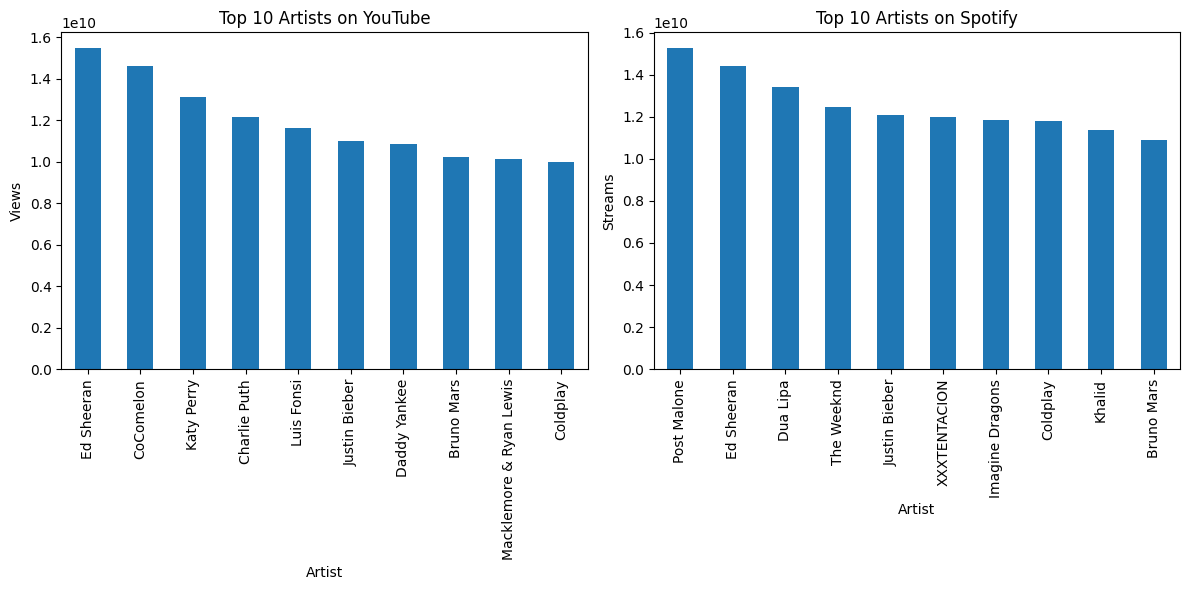

In [68]:
## Create two separate DataFrames for views and streams
artist_views_df=df.groupby("Artist")['Views'].sum().sort_values(ascending=False)[:10]

artist_Stream_df=df.groupby("Artist")['Stream'].sum().sort_values(ascending=False)[:10]

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

# top 10 yt
ax1.set_title('Top 10 Artists on YouTube')
artist_views_df.plot(kind='bar', ax=ax1)

# top 10 spotofy
ax2.set_title('Top 10 Artists on Spotify')
artist_Stream_df.plot(kind='bar', ax=ax2)


ax1.set_xlabel('Artist')
ax1.set_ylabel('Views')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')
fig.tight_layout()
plt.show()

In [69]:
# Top 10 songs based on views
top10_views = df.nlargest(10, 'Views')

# Top 10 songs based on comments
top10_comments = df.nlargest(10, 'Comments')

# Top 10 songs based on likes
top10_likes = df.nlargest(10, 'Likes')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15272\1980015869.py:15: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.tight_layout()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15272\1980015869.py:15: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.tight_layout()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15272\1980015869.py:15: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.tight_layout()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15272\1980015869.py:15: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.tight_layout()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15272\1980015869.py:15: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.tight_layout()
C:\Users\ADMIN\anaconda3\envs\MachineLearning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from curre

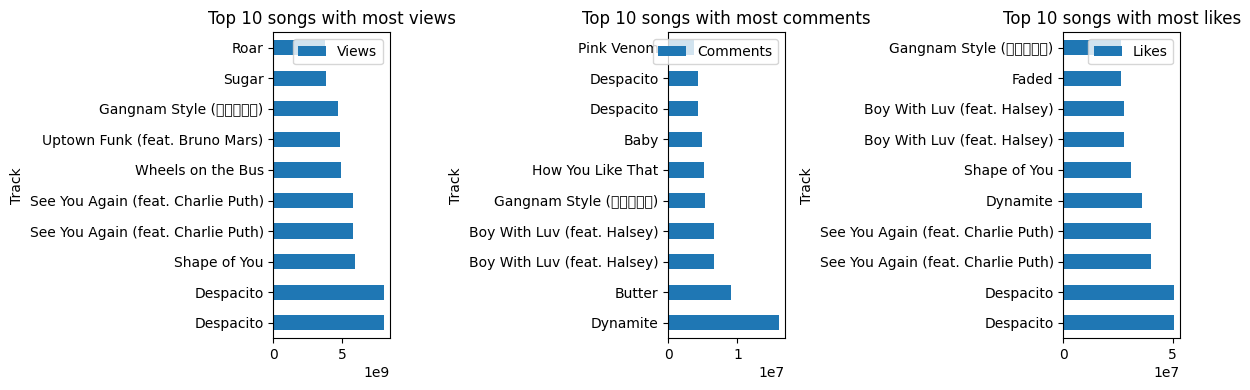

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Top 10 songs with most views
top10_views.plot(kind='barh', x='Track', y='Views', ax=axs[0])
axs[0].set_title('Top 10 songs with most views')

# Top 10 songs with most comments
top10_comments.plot(kind='barh', x='Track', y='Comments', ax=axs[1])
axs[1].set_title('Top 10 songs with most comments')

# Top 10 songs with most likes
top10_likes.plot(kind='barh', x='Track', y='Likes', ax=axs[2])
axs[2].set_title('Top 10 songs with most likes')

fig.tight_layout()


plt.show()


In [71]:
top_songs = df.sort_values('Stream', ascending=False).head(10)
top_songs[['Track', 'Energy', 'Danceability', 'Acousticness']]

,Track,Energy,Danceability,Acousticness
15250,Blinding Lights,0.730,0.514,0.00146
12452,Shape of You,0.652,0.825,0.58100
19186,Someone You Loved,0.405,0.501,0.75100
17937,rockstar (feat. 21 Savage),0.520,0.585,0.12400
17938,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
17445,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
13503,One Dance,0.625,0.792,0.00776
16028,Closer,0.524,0.748,0.41400
16099,Closer,0.524,0.748,0.41400
14030,Believer,0.780,0.776,0.06220


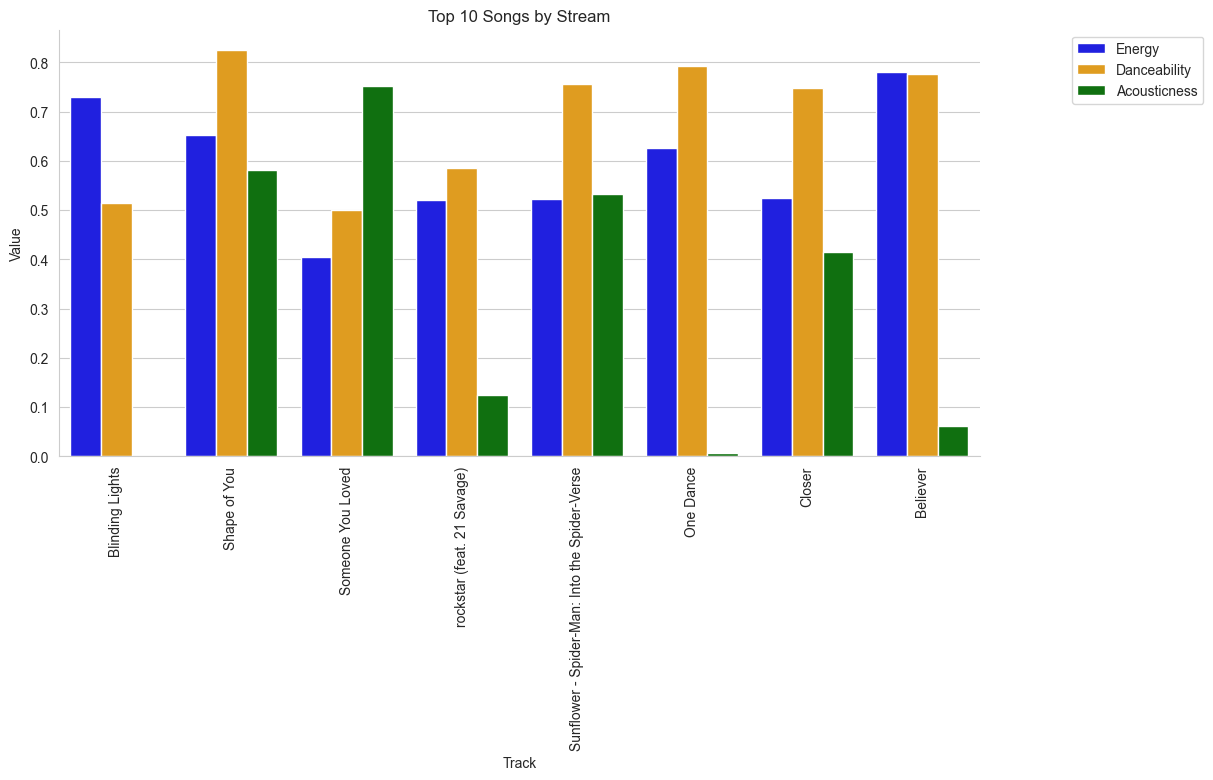

In [72]:
top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'],
                                var_name='Attribute', value_name='Value')

sns.set_style('whitegrid')
sns.catplot(x='Track', y='Value', hue='Attribute', data=top_songs_melt, kind='bar',
            palette={'Energy': 'blue', 'Danceability': 'orange', 'Acousticness': 'green'},
            aspect=2, legend=False)


plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Top 10 Songs by Stream')
plt.xlabel('Track')
plt.ylabel('Value')

plt.xticks(rotation=90)
plt.show()